<a href="https://colab.research.google.com/github/GhaziAziz/PricePrediction/blob/main/Pakistan_realEstate_Price_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pakistan realEstate Price Prediction Using ML

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Importing** **the RealEstate price DataSets**

In [ ]:
data = 'RealEststeDataset.csv'
df = pd.read_csv(data)
df.head()

,Property_Id,Purpose,City,Province,Property Type,Location,Short Desc,Price in words,Price,Size (in Zameen.com),...,"Area Category (Marla, Kanal)","Area Type (Marla, Kanal)","Size (Marla, Kanal)","Area Type (Marla, Kanal, Sq. Yd)","Size (Marla, Kanal, Sq. Yd)",Long Desc,Long Location,Creation_date,Updation_date,Link
0,46006834,Sale,Faisalabad,Punjab,House,204 Chak Road,12.25 Marla Double Storey House For Sale In Ze...,2.7 Crore,27000000.0,12.2 Marla,...,10-15 Marla,Marla,12.2,Marla,12.2,12.25 Marla Double story House for,"204 Chak Road, Faisalabad",Added: 4 days ago,(Updated: 3 days ago),https://www.zameen.com/Property/faisalabad_204...
1,45921049,Sale,Faisalabad,Punjab,House,Abdullah Garden,10 Marla Fully Furnished Lavish House Availabl...,5.25 Crore,52500000.0,10 Marla,...,5-10 Marla,Marla,10.0,Marla,10.0,- Excellent sun lighting &amp; cros,"Abdullah Garden, Faisalabad",Added: 3 days ago,NaN,https://www.zameen.com/Property/faisalabad_abd...
2,46024353,Sale,Faisalabad,Punjab,House,Abdullah Garden,10 Marla House for Sale in Abdullah Garden Can...,5 Crore,50000000.0,10 Marla,...,5-10 Marla,Marla,10.0,Marla,10.0,- Excellent sun lighting &amp; cros,"Abdullah Garden, Faisalabad",Added: 3 days ago,(Updated: 2 days ago),https://www.zameen.com/Property/faisalabad_abd...
3,45551860,Sale,Faisalabad,Punjab,House,Abdullah Gardens,house for sale,4.15 Crore,41500000.0,10 Marla,...,5-10 Marla,Marla,10.0,Marla,10.0,good location New house for,"Abdullah Gardens, East Canal Road",Added: 5 days ago,(Updated: 3 days ago),https://www.zameen.com/Property/east_canal_roa...
4,46035111,Sale,Faisalabad,Punjab,House,Abdullah Gardens,15 Marla vvip luxury house available for sale ...,8.5 Crore,85000000.0,15 Marla,...,10-15 Marla,Marla,15.0,Marla,15.0,ideal location for residential\n15 M,"Abdullah Gardens, East Canal Road",Added: 2 days ago,(Updated: 2 days ago),https://www.zameen.com/Property/east_canal_roa...


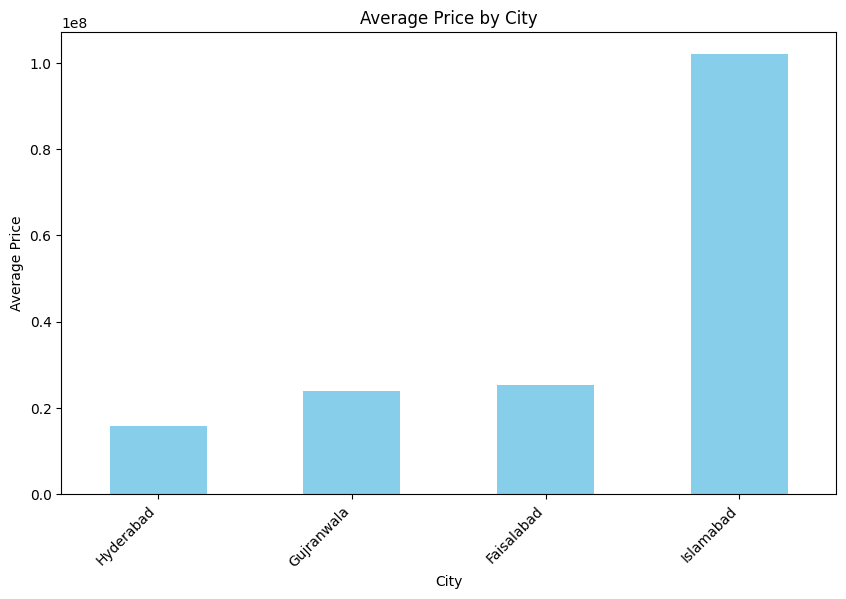

In [ ]:
df_plot = df[['City', 'Price']].dropna()

# Group by province and calculate the mean price
average_price_by_province = df_plot.groupby('City')['Price'].mean().sort_values()

# Plot the bar graph
plt.figure(figsize=(10, 6))
average_price_by_province.plot(kind='bar', color='skyblue')
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

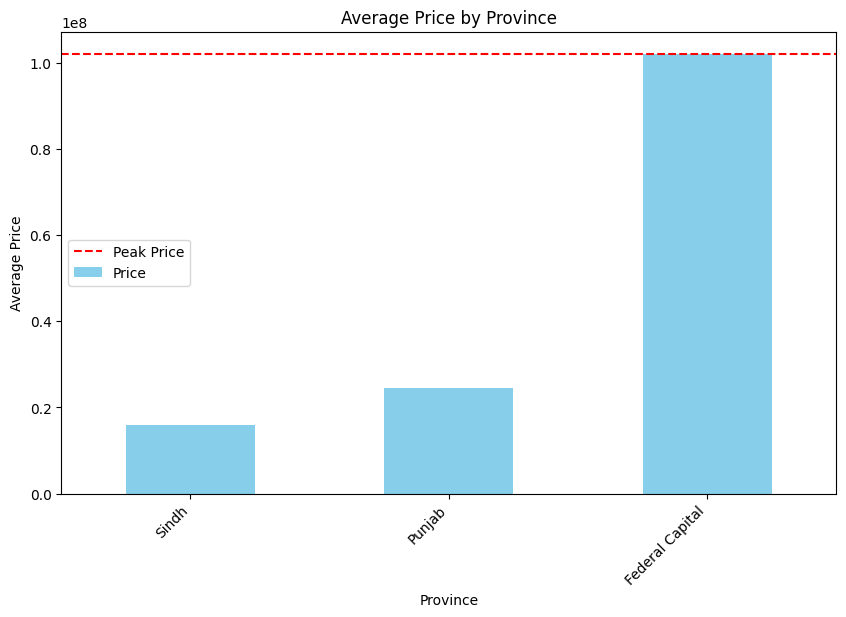

In [ ]:
df_plot = df[['Province', 'Price']].dropna()

# Group by province and calculate the mean price
average_price_by_province = df_plot.groupby('Province')['Price'].mean().sort_values()

# Plot the bar graph
plt.figure(figsize=(10, 6))
average_price_by_province.plot(kind='bar', color='skyblue')
plt.axhline(y=average_price_by_province.max(), color='red', linestyle='--', label='Peak Price')
plt.title('Average Price by Province')
plt.xlabel('Province')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

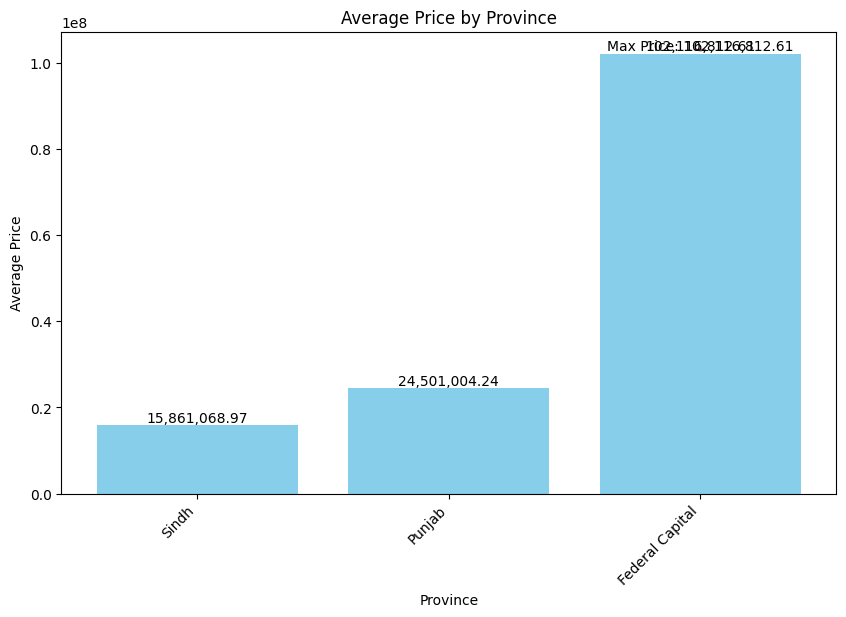

In [ ]:
df_plot = df[['Province', 'Price']].dropna()

# Group by province and calculate the mean price
average_price_by_province = df_plot.groupby('Province')['Price'].mean().sort_values()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(average_price_by_province.index, average_price_by_province.values, color='skyblue')

# Add text annotations for mean prices above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{bar.get_height():,.2f}', ha='center', va='bottom')

# Highlight the bar with the maximum price
max_price_province = average_price_by_province.idxmax()
max_price = average_price_by_province.max()
plt.annotate(f'Max Price: {max_price:,.2f}',
             xy=(max_price_province, max_price),
             xytext=(max_price_province, max_price + 1),
             ha='center', va='bottom',
             arrowprops=dict(facecolor='red', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

plt.title('Average Price by Province')
plt.xlabel('Province')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

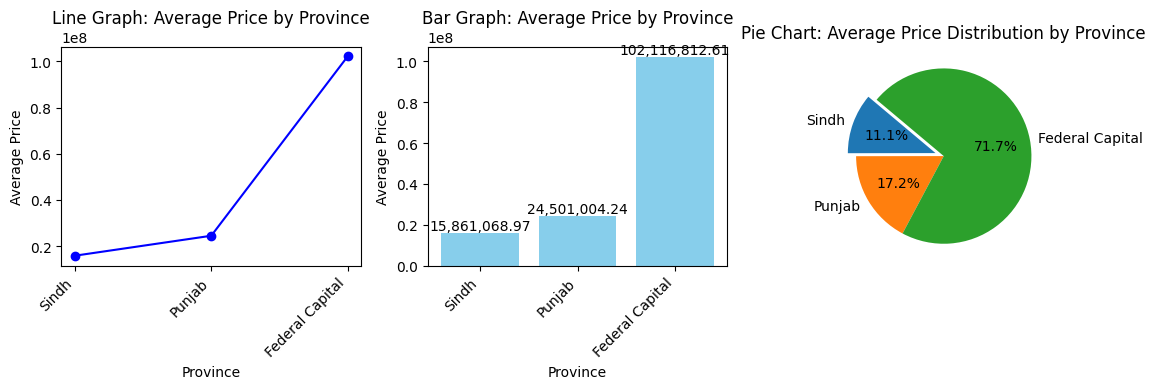

In [ ]:
# Create a DataFrame with only relevant columns
df_plot = df[['Province', 'Price']].dropna()

# Group by province and calculate the mean price
average_price_by_province = df_plot.groupby('Province')['Price'].mean().sort_values()

# Line Graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(average_price_by_province.index, average_price_by_province.values, marker='o', color='b')
plt.title('Line Graph: Average Price by Province')
plt.xlabel('Province')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')

# Bar Graph
plt.subplot(1, 3, 2)
bars = plt.bar(average_price_by_province.index, average_price_by_province.values, color='skyblue')
plt.title('Bar Graph: Average Price by Province')
plt.xlabel('Province')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{bar.get_height():,.2f}', ha='center', va='bottom')


# Pie Chart
plt.subplot(1, 3, 3)

# Determine the number of provinces
num_provinces = len(average_price_by_province)

# Create an explode tuple with the first slice exploded
explode = tuple(0.1 if i == 0 else 0 for i in range(num_provinces))

plt.pie(average_price_by_province, labels=average_price_by_province.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Pie Chart: Average Price Distribution by Province')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

In [ ]:
df.head(10)

,Property_Id,Purpose,City,Province,Property Type,Location,Short Desc,Price in words,Price,Size (in Zameen.com),...,"Area Category (Marla, Kanal)","Area Type (Marla, Kanal)","Size (Marla, Kanal)","Area Type (Marla, Kanal, Sq. Yd)","Size (Marla, Kanal, Sq. Yd)",Long Desc,Long Location,Creation_date,Updation_date,Link
0,46006834,Sale,Faisalabad,Punjab,House,204 Chak Road,12.25 Marla Double Storey House For Sale In Ze...,2.7 Crore,27000000.0,12.2 Marla,...,10-15 Marla,Marla,12.2,Marla,12.2,12.25 Marla Double story House for,"204 Chak Road, Faisalabad",Added: 4 days ago,(Updated: 3 days ago),https://www.zameen.com/Property/faisalabad_204...
1,45921049,Sale,Faisalabad,Punjab,House,Abdullah Garden,10 Marla Fully Furnished Lavish House Availabl...,5.25 Crore,52500000.0,10 Marla,...,5-10 Marla,Marla,10.0,Marla,10.0,- Excellent sun lighting &amp; cros,"Abdullah Garden, Faisalabad",Added: 3 days ago,NaN,https://www.zameen.com/Property/faisalabad_abd...
2,46024353,Sale,Faisalabad,Punjab,House,Abdullah Garden,10 Marla House for Sale in Abdullah Garden Can...,5 Crore,50000000.0,10 Marla,...,5-10 Marla,Marla,10.0,Marla,10.0,- Excellent sun lighting &amp; cros,"Abdullah Garden, Faisalabad",Added: 3 days ago,(Updated: 2 days ago),https://www.zameen.com/Property/faisalabad_abd...
3,45551860,Sale,Faisalabad,Punjab,House,Abdullah Gardens,house for sale,4.15 Crore,41500000.0,10 Marla,...,5-10 Marla,Marla,10.0,Marla,10.0,good location New house for,"Abdullah Gardens, East Canal Road",Added: 5 days ago,(Updated: 3 days ago),https://www.zameen.com/Property/east_canal_roa...
4,46035111,Sale,Faisalabad,Punjab,House,Abdullah Gardens,15 Marla vvip luxury house available for sale ...,8.5 Crore,85000000.0,15 Marla,...,10-15 Marla,Marla,15.0,Marla,15.0,ideal location for residential\n15 M,"Abdullah Gardens, East Canal Road",Added: 2 days ago,(Updated: 2 days ago),https://www.zameen.com/Property/east_canal_roa...
5,45588444,Sale,Faisalabad,Punjab,House,Abdullah Gardens,Beautiful Brand New Villa For Sale - Abdullah ...,12 Crore,120000000.0,1 Kanal,...,1-5 Kanal,Kanal,1.0,Kanal,1.0,20 Marla Beautiful &amp; Lavish Vil,"Abdullah Gardens, East Canal Road",Added: 2 weeks ago,(Updated: 5 days ago),https://www.zameen.com/Property/east_canal_roa...
6,45646425,Sale,Faisalabad,Punjab,House,Abdullah Gardens,Ideal Location 32 Marla Brand New House For Sa...,16 Crore,160000000.0,1.6 Kanal,...,1-5 Kanal,Kanal,1.6,Kanal,1.6,( FOR SALE ) IDEAL LOCATION \n32 Mar,"Abdullah Gardens, East Canal Road",Added: 4 weeks ago,(Updated: 5 days ago),https://www.zameen.com/Property/east_canal_roa...
7,44623712,Sale,Faisalabad,Punjab,House,Abdullah Gardens,20 Marla Beautiful Brand New Villa For Sale - ...,12 Crore,120000000.0,1 Kanal,...,1-5 Kanal,Kanal,1.0,Kanal,1.0,20 Marla Beautiful and Lavish Brand,"Abdullah Gardens, East Canal Road",Added: 6 days ago,(Updated: 5 days ago),https://www.zameen.com/Property/east_canal_roa...
8,44623713,Sale,Faisalabad,Punjab,House,Abdullah Gardens,10 Marla Brand New Villa For Sale - Abdullah G...,5 Crore,50000000.0,10 Marla,...,5-10 Marla,Marla,10.0,Marla,10.0,10 Marla Beautiful and Lavish Brand,"Abdullah Gardens, East Canal Road",Added: 1 week ago,(Updated: 5 days ago),https://www.zameen.com/Property/east_canal_roa...
9,45466727,Sale,Faisalabad,Punjab,House,Abdullah Gardens,1 kanal East Open House,13 Crore,130000000.0,1 Kanal,...,1-5 Kanal,Kanal,1.0,Kanal,1.0,Executive Location : Abdullah Garde,"Abdullah Gardens, East Canal Road",Added: 4 days ago,NaN,https://www.zameen.com/Property/east_canal_roa...


# Cleaning The Data

1.   List item
2.   List item



As Obove these columns are not in need
{ Area Category (Marla, Kanal)
          1
Area Type (Marla, Kanal)   
            1
Size (Marla, Kanal)     
               1
Area Type (Marla, Kanal, Sq. Yd)
      1
Size (Marla, Kanal, Sq. Yd)
         1}


In [ ]:
df = df.drop(columns= ['Area Category (Marla, Kanal)'])
df = df.drop(columns= ['Area Type (Marla, Kanal)'])
df = df.drop(columns= ['Size (Marla, Kanal)'])
df = df.drop(columns= ['Long Desc'])
df = df.drop(columns= ['Updation_date'])
df = df.drop(columns= ['Short Desc'])

In [ ]:
df.head(3)

,Property_Id,Purpose,City,Province,Property Type,Location,Price in words,Price,Size (in Zameen.com),Bedrooms,Baths,"Area Type (Marla, Kanal, Sq. Yd)","Size (Marla, Kanal, Sq. Yd)",Long Location,Creation_date,Link
0,46006834,Sale,Faisalabad,Punjab,House,204 Chak Road,2.7 Crore,27000000.0,12.2 Marla,5.0,5.0,Marla,12.2,"204 Chak Road, Faisalabad",Added: 4 days ago,https://www.zameen.com/Property/faisalabad_204...
1,45921049,Sale,Faisalabad,Punjab,House,Abdullah Garden,5.25 Crore,52500000.0,10 Marla,6.0,6.0,Marla,10.0,"Abdullah Garden, Faisalabad",Added: 3 days ago,https://www.zameen.com/Property/faisalabad_abd...
2,46024353,Sale,Faisalabad,Punjab,House,Abdullah Garden,5 Crore,50000000.0,10 Marla,NaN,NaN,Marla,10.0,"Abdullah Garden, Faisalabad",Added: 3 days ago,https://www.zameen.com/Property/faisalabad_abd...


In [ ]:
df.shape

(10108, 16)

In [ ]:
df.isnull().sum()

Property_Id                            0
Purpose                                0
City                                   0
Province                               0
Property Type                          0
Location                               0
Price in words                         1
Price                                  1
Size (in Zameen.com)                   1
Bedrooms                            1285
Baths                               1406
Area Type (Marla, Kanal, Sq. Yd)       1
Size (Marla, Kanal, Sq. Yd)            1
Long Location                          1
Creation_date                          1
Link                                   1
dtype: int64

## Droping the NuLL Values

# New Section

In [ ]:
df.dropna()

,Property_Id,Purpose,City,Province,Property Type,Location,Price in words,Price,Size (in Zameen.com),Bedrooms,Baths,"Area Type (Marla, Kanal, Sq. Yd)","Size (Marla, Kanal, Sq. Yd)",Long Location,Creation_date,Link
0,46006834,Sale,Faisalabad,Punjab,House,204 Chak Road,2.7 Crore,27000000.0,12.2 Marla,5.0,5.0,Marla,12.2,"204 Chak Road, Faisalabad",Added: 4 days ago,https://www.zameen.com/Property/faisalabad_204...
1,45921049,Sale,Faisalabad,Punjab,House,Abdullah Garden,5.25 Crore,52500000.0,10 Marla,6.0,6.0,Marla,10.0,"Abdullah Garden, Faisalabad",Added: 3 days ago,https://www.zameen.com/Property/faisalabad_abd...
3,45551860,Sale,Faisalabad,Punjab,House,Abdullah Gardens,4.15 Crore,41500000.0,10 Marla,5.0,6.0,Marla,10.0,"Abdullah Gardens, East Canal Road",Added: 5 days ago,https://www.zameen.com/Property/east_canal_roa...
4,46035111,Sale,Faisalabad,Punjab,House,Abdullah Gardens,8.5 Crore,85000000.0,15 Marla,3.0,3.0,Marla,15.0,"Abdullah Gardens, East Canal Road",Added: 2 days ago,https://www.zameen.com/Property/east_canal_roa...
5,45588444,Sale,Faisalabad,Punjab,House,Abdullah Gardens,12 Crore,120000000.0,1 Kanal,5.0,6.0,Kanal,1.0,"Abdullah Gardens, East Canal Road",Added: 2 weeks ago,https://www.zameen.com/Property/east_canal_roa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102,44503735,Sale,Islamabad,Federal Capital,House,G-13,9.25 Crore,92500000.0,14 Marla,7.0,6.0,Marla,14.0,"G-13, Islamabad",Added: 4 weeks ago,https://www.zameen.com/Property/islamabad_g_13...
10103,45544082,Sale,Islamabad,Federal Capital,House,G-13,1.55 Crore,15500000.0,9.1 Marla,3.0,2.0,Marla,9.1,"G-13, Islamabad",Added: 4 days ago,https://www.zameen.com/Property/islamabad_g_13...
10104,45292593,Sale,Islamabad,Federal Capital,House,G-13,53 Lakh,5300000.0,6 Marla,2.0,2.0,Marla,6.0,"G-13/1, G-13",Added: 4 days ago,https://www.zameen.com/Property/g_13_g_13_1_c_...
10105,45544082,Sale,Islamabad,Federal Capital,House,G-13,1.55 Crore,15500000.0,9.1 Marla,3.0,3.0,Marla,9.1,"G-13, Islamabad",Added: 4 days ago,https://www.zameen.com/Property/islamabad_g_13...


In [ ]:
df = df.drop(columns= ['Price in words'])
df = df.drop(columns=['Location'])

In [ ]:
df = df.drop_duplicates()
df.head()

,Property_Id,Purpose,City,Province,Property Type,Price,Size (in Zameen.com),Bedrooms,Baths,"Area Type (Marla, Kanal, Sq. Yd)","Size (Marla, Kanal, Sq. Yd)",Long Location,Creation_date,Link
0,46006834,Sale,Faisalabad,Punjab,House,27000000.0,12.2 Marla,5.0,5.0,Marla,12.2,"204 Chak Road, Faisalabad",Added: 4 days ago,https://www.zameen.com/Property/faisalabad_204...
1,45921049,Sale,Faisalabad,Punjab,House,52500000.0,10 Marla,6.0,6.0,Marla,10.0,"Abdullah Garden, Faisalabad",Added: 3 days ago,https://www.zameen.com/Property/faisalabad_abd...
2,46024353,Sale,Faisalabad,Punjab,House,50000000.0,10 Marla,NaN,NaN,Marla,10.0,"Abdullah Garden, Faisalabad",Added: 3 days ago,https://www.zameen.com/Property/faisalabad_abd...
3,45551860,Sale,Faisalabad,Punjab,House,41500000.0,10 Marla,5.0,6.0,Marla,10.0,"Abdullah Gardens, East Canal Road",Added: 5 days ago,https://www.zameen.com/Property/east_canal_roa...
4,46035111,Sale,Faisalabad,Punjab,House,85000000.0,15 Marla,3.0,3.0,Marla,15.0,"Abdullah Gardens, East Canal Road",Added: 2 days ago,https://www.zameen.com/Property/east_canal_roa...


In [ ]:
df.shape

(10107, 14)

In [ ]:
df = df.dropna(subset=['Bedrooms'])
df = df.dropna(subset=['Baths'])

In [ ]:
df.head()

,Property_Id,Purpose,City,Province,Property Type,Price,Size (in Zameen.com),Bedrooms,Baths,"Area Type (Marla, Kanal, Sq. Yd)","Size (Marla, Kanal, Sq. Yd)",Long Location,Creation_date,Link
0,46006834,Sale,Faisalabad,Punjab,House,27000000.0,12.2 Marla,5.0,5.0,Marla,12.2,"204 Chak Road, Faisalabad",Added: 4 days ago,https://www.zameen.com/Property/faisalabad_204...
1,45921049,Sale,Faisalabad,Punjab,House,52500000.0,10 Marla,6.0,6.0,Marla,10.0,"Abdullah Garden, Faisalabad",Added: 3 days ago,https://www.zameen.com/Property/faisalabad_abd...
3,45551860,Sale,Faisalabad,Punjab,House,41500000.0,10 Marla,5.0,6.0,Marla,10.0,"Abdullah Gardens, East Canal Road",Added: 5 days ago,https://www.zameen.com/Property/east_canal_roa...
4,46035111,Sale,Faisalabad,Punjab,House,85000000.0,15 Marla,3.0,3.0,Marla,15.0,"Abdullah Gardens, East Canal Road",Added: 2 days ago,https://www.zameen.com/Property/east_canal_roa...
5,45588444,Sale,Faisalabad,Punjab,House,120000000.0,1 Kanal,5.0,6.0,Kanal,1.0,"Abdullah Gardens, East Canal Road",Added: 2 weeks ago,https://www.zameen.com/Property/east_canal_roa...


In [ ]:
df.shape

(8629, 14)

In [ ]:
df.isnull().sum()

Property_Id                         0
Purpose                             0
City                                0
Province                            0
Property Type                       0
Price                               0
Size (in Zameen.com)                0
Bedrooms                            0
Baths                               0
Area Type (Marla, Kanal, Sq. Yd)    0
Size (Marla, Kanal, Sq. Yd)         0
Long Location                       0
Creation_date                       0
Link                                0
dtype: int64

In [ ]:
df.describe()

,Property_Id,Price,Bedrooms,Baths,"Size (Marla, Kanal, Sq. Yd)"
count,8.629000e+03,8.629000e+03,8629.000000,8629.000000,8629.000000
mean,4.495616e+07,8.089666e+07,4.364121,4.431916,9.455858
std,2.525755e+06,1.488965e+08,1.952256,1.794019,32.010446
min,1.051678e+07,1.350000e+05,1.000000,1.000000,1.000000
25%,4.510946e+07,1.540000e+07,3.000000,3.000000,2.200000
50%,4.564281e+07,3.250000e+07,4.000000,5.000000,5.000000
75%,4.590462e+07,8.600000e+07,6.000000,6.000000,8.800000
max,4.604853e+07,2.500000e+09,11.000000,10.000000,1800.000000


What is Mean Of df.describe()

1. **count:** This row provides the count of non-null values for each column. For example, there are 8,629 non-null values for each of the columns: Property_Id, Price, Bedrooms, Baths, and Size.

2. **mean:** This row gives the mean (average) value for each column. For example, the mean Property_Id is approximately 4.495616e+07, the mean Price is approximately 8.089666e+07, the mean number of Bedrooms is approximately 4.364121, the mean number of Baths is approximately 4.431916, and the mean Size is approximately 9.455858.

3. **std:** This row provides the standard deviation for each column. Standard deviation is a measure of the amount of variation or dispersion in a set of values. It gives you an idea of how spread out the values are from the mean.

4. **min:** This row gives the minimum value for each column. For example, the minimum Property_Id is approximately 1.051678e+07, the minimum Price is 1.350000e+05, the minimum number of Bedrooms is 1, the minimum number of Baths is 1, and the minimum Size is 1.000000.

5. **25%, 50%, 75%:** These rows represent the 25th, 50th (median), and 75th percentiles of the data, respectively. For example, at the 25th percentile, the Property_Id is approximately 4.510946e+07, the Price is 1.540000e+07, the number of Bedrooms is 3, the number of Baths is 3, and the Size is 2.200000. These percentiles give you an idea of the distribution of your data.

6. **max:** This row gives the maximum value for each column. For example, the maximum Property_Id is approximately 4.604853e+07, the maximum Price is 2.500000e+09, the maximum number of Bedrooms is 11, the maximum number of Baths is 10, and the maximum Size is 1800.000000.

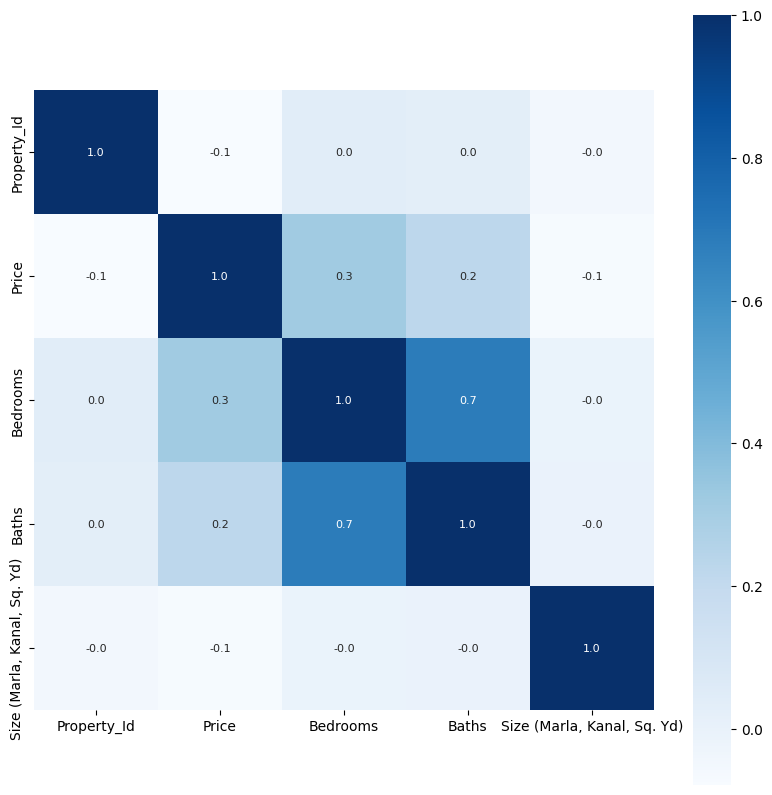

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
cor = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cor, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size': 8}, cmap="Blues")
plt.show()


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

X = df_encoded.drop('Price', axis=1)
Y = df_encoded['Price']

In [ ]:
print(X)
print(Y)

       Property_Id  Bedrooms  Baths  Size (Marla, Kanal, Sq. Yd)  \
0         46006834       5.0    5.0                         12.2   
1         45921049       6.0    6.0                         10.0   
3         45551860       5.0    6.0                         10.0   
4         46035111       3.0    3.0                         15.0   
5         45588444       5.0    6.0                          1.0   
...            ...       ...    ...                          ...   
10102     44503735       7.0    6.0                         14.0   
10103     45544082       3.0    2.0                          9.1   
10104     45292593       2.0    2.0                          6.0   
10105     45544082       3.0    3.0                          9.1   
10106     44106678       5.0    4.0                          4.4   

       City_Gujranwala  City_Hyderabad  City_Islamabad  Province_Punjab  \
0                    0               0               0                1   
1                    0           

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, sparse=True)
# Sample a random subset of the data
df_subset = df.sample(frac=0.1, random_state=42)
df_encoded = pd.get_dummies(df_subset, columns=categorical_columns, drop_first=True).astype('int32')

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, sparse=True).astype('int32')

<ipython-input-30-66ff7dd36f23>:6: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, sparse=True).astype('int32')


In [ ]:
# Identify categorical columns in your DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Separate features and target variable
X = df_encoded.drop('Price', axis=1)
Y = df_encoded['Price']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Instantiate the XGBRegressor model
model = XGBRegressor()

# Train the model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
train_data_prediction = model.predict(X_train)
score_1 = metrics.r2_score(Y_train, train_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, train_data_prediction)
print('Accuracy: ',score_1)
print('Absolute Error: ',score_2)

Accuracy:  0.9825178946956773
Absolute Error:  11399532.225499783


<function matplotlib.pyplot.show(close=None, block=None)>

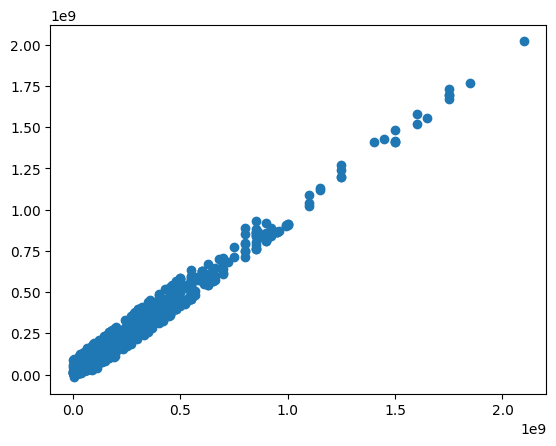

In [ ]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel=("Actual Price")
plt.ylabel=("Predicted Price")
plt.title=("Real Estate Price Prediction")
plt.show

In [ ]:
model_path= r'C:\Users\Lenovo\Desktop\Model\price.rgb'

In [ ]:
model.save_model(model_path)
print(f'Model saved to {model_path}')

Model saved to C:\Users\Lenovo\Desktop\Model\price.rgb


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:31:00] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [ ]:
loaded_model = XGBRegressor()
loaded_model.load_model(model_path)

In [ ]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import xgboost as xgb
import numpy as np

# Load the XGBoost model
model = xgb.XGBRegressor()
model.load_model(model_path)

app = FastAPI()

class Item(BaseModel):
    Property_Id: int
    Purpose: str
    City: str
    Province: str
    Property_Type: str
    Price: float
    Size_Zameen_com: float
    Bedrooms: int
    Baths: int
    Area_Type: str
    Size_Marla_Kanal_Sq_Yd: float
    Long_Location: float
    Creation_date: str

@app.post("/predict")
def predict(item: Item):
    # Convert input data to a numpy array for prediction
    input_data = np.array([[
        item.Property_Id, item.Price, item.Size_Zameen_com,
        item.Bedrooms, item.Baths, item.Size_Marla_Kanal_Sq_Yd, item.Long_Location
    ]])

    # Make predictions using the loaded model
    prediction = model.predict(input_data)

    # Return the prediction
    return {"prediction": prediction[0]}


ImportError: ignored

In [ ]:
pip install -U typing-extensions
